In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pygsp import graphs, filters
from pygsp import plotting as gsp_plt
from nilearn import image, plotting, datasets

Defaulting to user installation because normal site-packages is not writeable
  Created wheel for TADtool: filename=tadtool-0.82-py3-none-any.whl size=19036 sha256=4917e00f2eff6cbb977f84c54404264b5e0b5ac5697febca6a5d7cca63b18882
  Stored in directory: /homes/v20subra/.cache/pip/wheels/1e/23/6f/c4595c2fb6e406621004228750e362d9061a203fe42852bec1
Successfully built TADtool
You should consider upgrading via the '/usr/bin/X11/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [10]:
from pathlib import Path
from scipy import io as sio
from pygsp import graphs

path_Glasser='S4B2/GSP/Glasser_masker.nii.gz'
res_path=''

# Load structural connectivity matrix
connectivity = sio.loadmat('/homes/v20subra/S4B2/GSP/SC_avg56.mat')['SC_avg56']
connectivity.shape
coordinates = sio.loadmat('/homes/v20subra/S4B2/GSP/Glasser360_2mm_codebook.mat')['codeBook'] # coordinates in brain space


#G_Comb = graphs.Graph(connectivity,gtype='HCP subject',lap_type='combinatorial',coords=coordinates)# combinatorial laplacian
G=graphs.Graph(connectivity,gtype='HCP subject',lap_type='normalized',coords=coordinates) #
#G_RandW=graphs.Graph(connectivity,gtype='HCP subject',lap_type='normalized',coords=coordinates) #
print(G.is_connected())


G.set_coordinates('spring')
#G.plot()   #edges > 10^4 not shown
D=np.array(G.dw)
D.shape


True


(360,)

In [3]:
G.compute_fourier_basis()

In [5]:
import numpy as np
with np.load(f"/homes/v20subra/S4B2/GSP/hcp/atlas.npz") as dobj:
    atlas = dict(**dobj)

In [11]:
high = np.load('/users/local/Venkatesh/Generated_Data/high_isc_averaged_with_cov.npz')['high_isc_averaged']
low = np.load('/users/local/Venkatesh/Generated_Data/low_isc_averaged_with_cov.npz')['low_isc_averaged']
np.shape(low)

(10, 360, 500)

In [6]:
np.shape(low[0])

(360, 500)

In [34]:
low_gft = [G.gft(np.array(low[0])),G.gft(np.array(low[1])), 
       G.gft(np.array(low[2])), G.gft(np.array(low[3])), 
       G.gft(np.array(low[4])), G.gft(np.array(low[5])),
       G.gft(np.array(low[6])), G.gft(np.array(low[7])), 
       G.gft(np.array(low[8])), G.gft(np.array(low[9]))]



2021-09-20 18:35:38,956:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


In [35]:
high_gft = [G.gft(np.array(high[0])),G.gft(np.array(high[1])), 
       G.gft(np.array(high[2])), G.gft(np.array(high[3])), 
       G.gft(np.array(high[4])), G.gft(np.array(high[5])),
       G.gft(np.array(high[6])), G.gft(np.array(high[7])), 
       G.gft(np.array(high[8])), G.gft(np.array(high[9]))]

differenced = np.array(high_gft) - np.array(low_gft)


In [10]:
differenced_low_freq = differenced[:,1:51,:]
differenced_medium_freq = differenced[:,51:200,:]
differenced_high_freq = differenced[:,200:,:]

In [ ]:
np.shape(np.std(diff,axis=0))

In [6]:

import matplotlib
import seaborn as sns
def heatmap(diff,title,start1,end1,div,start2,end2,operation,ylabel):
    cmap_reversed = matplotlib.cm.get_cmap('Spectral').reversed()
    if operation == 'std':
        sns.heatmap(np.std(diff,axis=0),cmap = cmap_reversed)
    else:
        sns.heatmap(np.average(diff,axis=0),cmap = cmap_reversed)
    plt.ylabel(ylabel)
    plt.xlabel('Time (s)')
    plt.xticks(ticks=[0,125,250,375,500],labels=["-0.5","-0.25","0","0.25","0.5"],rotation='horizontal')
    plt.yticks(ticks=np.arange(start1,end1,div),labels=np.arange(start2,end2,div),rotation='horizontal')
    plt.axvline(x=250, linestyle = '--', color='b')
    #plt.axvline(x=132, linestyle = '--', color='b')
    plt.title(title)
    plt.tight_layout()
    plt.figure()
heatmap(differenced_low_freq,'Spectrogram for 1-50 freqs (averaged thru subjs)',1,50,2,1,50,'AVG','gFreqs')# (differenced high with low & averaged through subjects )
heatmap(differenced_medium_freq,'Spectrogram for 50-200 freqs (averaged thru subjs)',1,150,5,50,200,'AVG','gFreqs')# (differenced high with low & averaged through subjects )
heatmap(differenced_high_freq,'Spectrogram for 200-360 freqs (averaged thru subjs)',1,160,5,200,360,'AVG','gFreqs')# (differenced high with low & averaged through subjects )


heatmap(differenced_low_freq,'Spectrogram for 1-50 freqs (std thru subjs)',1,50,2,1,50,'std','gFreqs')# (differenced high with low & averaged through subjects )
heatmap(differenced_medium_freq,'Spectrogram for 50-200 freqs (std thru subjs)',1,150,5,50,200,'std','gFreqs')# (differenced high with low & averaged through subjects )
heatmap(differenced_high_freq,'Spectrogram for 200-360 freqs (std thru subjs)',1,160,5,200,360,'AVG','gFreqs')# (differenced high with low & averaged through subjects )


# ### Subject-wise Spectra, while Time being variability


NameError: name 'differenced_low_freq' is not defined

### Subject-wise Spectra, while Time being variability

In [44]:
def mean_std(freq,ax):
    if ax>2:
        d = np.average(np.array(np.abs(freq)),axis=2)[:,1:]
    else: d = np.abs(freq[1:,:])
    mean_t = np.mean(d,axis=0)
    std_t = 2 * np.std(d,axis=0)
    top = mean_t + std_t
    bottom = mean_t - std_t
    
    return mean_t,std_t,top,bottom

### Power distribution finding

In [5]:
values,_,_,_ = mean_std(np.array(low_gft),3)
np.sum(values)/2

NameError: name 'low_gft' is not defined

In [39]:
np.sum(values[:142])

0.0041158380892656

In [42]:
G.e[143]

1.0240655747649001

### Dichotomy 

In [49]:
#1
l = np.where(G.e<=1.024)[0][1:]
h = np.where(G.e>1.024)[0]

In [65]:
def filters(isc,band,length):
    indicator = np.ones([1,length])
    cll =list() 
    cll.append(np.matmul(indicator,np.abs(np.array(isc)[0,band,:]))) # 1 x length & length x time
    for i in range(1,10):
        cll.append(np.matmul(indicator,np.abs(np.array(isc)[i,band,:])))
    cll = np.reshape(cll,[10,500])
    return cll

In [66]:


#def lowISC_high_ISC(*typ):
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(15,15))
typ = {'High ISC':high_gft,'Low ISC':low_gft}
for i in range(2):
        
        plt.subplot(a, b, c)
        cll1 = filters(typ[list(typ.keys())[i]],l,len(l))
        cll2 = filters(typ[list(typ.keys())[i]],h,len(h))
        mean_t1,std_t1, top1, bottom1= mean_std(cll1,2)
        mean_t2,std_t2, top2, bottom2= mean_std(cll2,2)

        
        plt.legend()
        plt.plot(range(500),mean_t1,color='b')
        plt.fill_between(range(500),bottom1,top1, color='b', alpha=.1,label='Low')
        plt.plot(range(500),mean_t2,color='r')
        plt.fill_between(range(500),bottom2, top2, color='r', alpha=.1,label='High')
        plt.ylabel('gPSDs sliced using Eigen values')
        plt.xlabel('Time (s)',fontsize=10)
        plt.title(list(typ.keys())[i])
        plt.xticks(ticks=[0,125,250,375,500],labels=["-0.5","-0.25","0","0.25","0.5"],rotation='horizontal')
        plt.axvline(x=250, linestyle = '--', color='g')
        
        #plt.ylabel('log (gPSD)')
        c = c + 1
plt.suptitle('Dichotomized the eigen values(at 1.02) such that the power distribution is same & sliced the PSD using the same [Low freq = blue] Note: used np.abs while using indicator')
plt.show()

# ideas:
#1. Sub-wise plot
#2. Freq-wise plot
#3. High - Low "dicotomized plot" and compare high - low heatmap



No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Frequency-wise


In [54]:


#def lowISC_high_ISC(*typ):
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(15,15))
typ = {'High ISC':high_gft,'Low ISC':low_gft}
freq = [l,h]
title = ['Low Frequency','High Frequency']
for i in range(2):
        
        plt.subplot(a, b, c)
        cll1 = filters(typ[list(typ.keys())[0]],freq[i],len(freq[i]))
        cll2 = filters(typ[list(typ.keys())[1]],freq[i],len(freq[i]))
        mean_t1,std_t1, top1, bottom1= mean_std(cll1,2)
        mean_t2,std_t2, top2, bottom2= mean_std(cll2,2)

        plt.legend()
        plt.plot(range(500),mean_t1,color='b')
        plt.fill_between(range(500),bottom1,top1, color='b', alpha=.1,label='High ISC')
        plt.plot(range(500),mean_t2,color='r')
        plt.fill_between(range(500),bottom2, top2, color='r', alpha=.1,label='Low ISC')
        #plt.title('Graph PSD for the conditions (CI = Subjects. Time = 0.6 - 0.7s, 50 samples)')
        plt.ylabel('gPSDs sliced using Eigen values')
        plt.xlabel('Time (s)',fontsize=10)
        plt.title(title[i])
        plt.xticks(ticks=[0,125,250,375,500],labels=["-0.5","-0.25","0","0.25","0.5"],rotation='horizontal')
        plt.axvline(x=250, linestyle = '--', color='g')
    
        c = c + 1
plt.suptitle('Dichotomized the eigen values(at 1.02) such that the power distribution is same & sliced the PSD using the same [blue = High ISC]')
plt.show()


No handles with labels found to put in legend.
No handles with labels found to put in legend.


### Subject-wise

In [ ]:
%matplotlib qt
%gui qt


def filters_subj(isc,band,length):
    indicator = np.ones([1,length])
    cll =list() 
    cll.append(np.matmul(indicator,np.abs(np.array(isc)[band,:])))
    
    cll = np.reshape(cll,[1,500])
    d = np.abs(freq[1:,:])
    #mean_t = np.mean(d,axis=0)
    #std_t = 2 * np.std(d,axis=0)
    #top = mean_t + std_t
    #bottom = mean_t - std_t
    
    return cll

#def lowISC_high_ISC(*typ):
a = 2  # number of rows
b = 5  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(10,10))
typ = {'High ISC':high,'Low ISC':low}
freq = [l,h]
for i in range(10):
        plt.subplot(a, b, c)
        cll1 = filters_subj(typ[list(typ.keys())[0]][i],freq[0],len(freq[0]))
        cll2 = filters_subj(typ[list(typ.keys())[0]][i],freq[1],len(freq[1]))
        
        mean_t1,std_t1, top1, bottom1= mean_std(cll1,2)
        mean_t2,std_t2, top2, bottom2= mean_std(cll2,2)
        
        
        plt.legend()
        plt.plot(range(500),mean_t1,color='b')
        plt.fill_between(range(500),bottom1,top1, color='b', alpha=.1,label='Low')
        plt.plot(range(500),mean_t2,color='r')
        plt.fill_between(range(500),bottom2, top2, color='r', alpha=.1,label='High')
        #plt.title('Graph PSD for the conditions (CI = Subjects. Time = 0.6 - 0.7s, 50 samples)')
        plt.xticks(ticks=[0,125,250,375,500],labels=["-0.5","-0.25","0","0.25","0.5"],rotation='horizontal')
        plt.axvline(x=250, linestyle = '--', color='g')
        

        plt.ylabel('gPSDs sliced using Eigen values')
        plt.xlabel('Time (s)',fontsize=10)
        plt.title('Low freq (high ISC = blue)')
        #plt.ylabel('log (gPSD)')
        c = c + 1
plt.suptitle('Dichotomized the eigen values(at 0.8) such that the power distribution is same & sliced the PSD using the same [Low freq = blue]')
plt.show()

In [52]:
np.savez_compressed('data.npz',mean_t1=mean_t1, mean_t2=mean_t2,mean_std=mean_std )


high_isc = [(np.array(averaging_by_parcellation(src_high1))),(np.array(averaging_by_parcellation(src_high2))), 
       (np.array(averaging_by_parcellation(src_high3))), (np.array(averaging_by_parcellation(src_high4))), 
       (np.array(averaging_by_parcellation(src_high5))), (np.array(averaging_by_parcellation(src_high6))),
       (np.array(averaging_by_parcellation(src_high7))), (np.array(averaging_by_parcellation(src_high8))), 
       (np.array(averaging_by_parcellation(src_high9))), (np.array(averaging_by_parcellation(src_high10)))]

low_isc = [(np.array(averaging_by_parcellation(src_low1))),(np.array(averaging_by_parcellation(src_low2))), 
       (np.array(averaging_by_parcellation(src_low3))), (np.array(averaging_by_parcellation(src_low4))), 
       (np.array(averaging_by_parcellation(src_low5))), (np.array(averaging_by_parcellation(src_low6))),
       (np.array(averaging_by_parcellation(src_low7))), (np.array(averaging_by_parcellation(src_low8))), 
       (np.array(averaging_by_parcellation(src_low9))), (np.array(averaging_by_parcellation(src_low10)))]


diff = np.array(high_isc) - np.array(low_isc)




Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
np.shape(high)

(10, 360, 500)

No handles with labels found to put in legend.


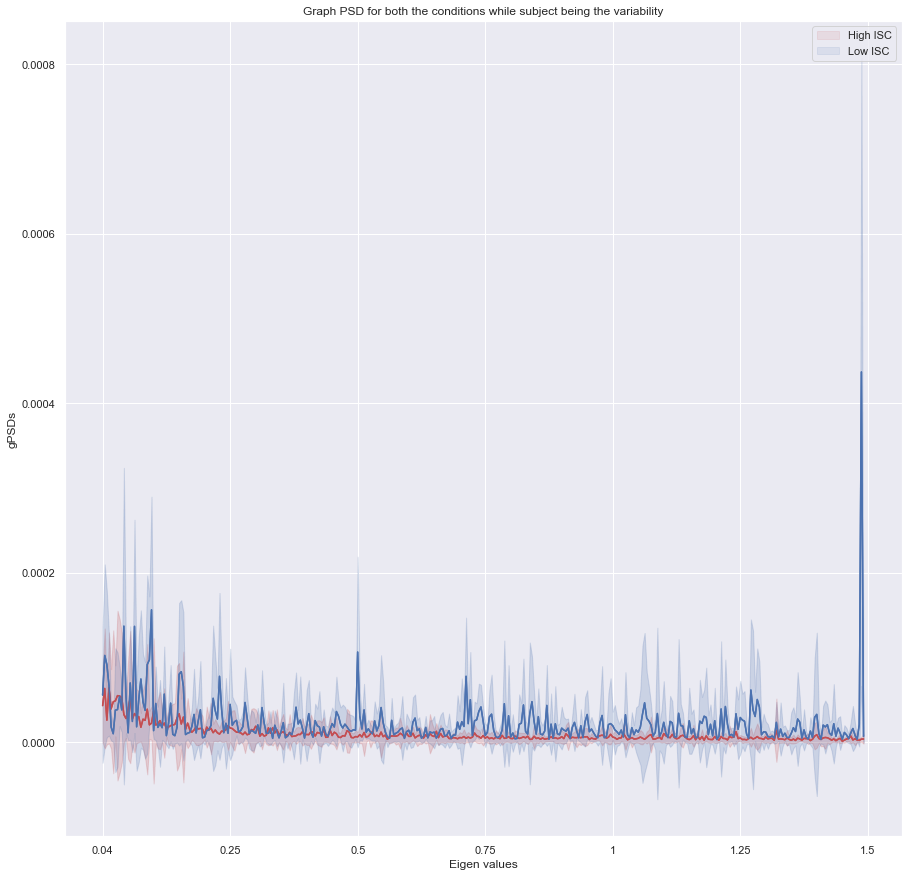

In [55]:


#def lowISC_high_ISC(*typ):
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(15,15))
typ = {'High ISC':high_gft,'Low ISC':low_gft}
for i in range(2):
        
        mean_t1,std_t1, top1, bottom1= mean_std(high_gft,3)
        mean_t2,std_t2, top2, bottom2= mean_std(low_gft,3)
        
        plt.legend()
        plt.plot(range(359),mean_t1,color='r')
        plt.fill_between(range(359),bottom1,top1, color='r', alpha=.1,label='High ISC')
        plt.plot(range(359),mean_t2,color='b')
        plt.fill_between(range(359),bottom2, top2, color='b', alpha=.1,label='Low ISC')
        plt.ylabel('gPSDs')
        plt.xlabel('Eigen values')
        plt.title('Graph PSD for both the conditions while subject being the variability')
        plt.xticks(ticks=[0,60,120,180,240,300,360],labels=["0.04","0.25","0.5","0.75","1","1.25","1.5"],rotation='horizontal')
        #plt.axvline(x=250, linestyle = '--', color='g')
        
        #plt.ylabel('log (gPSD)')
#plt.suptitle('Dichotomized the eigen values(at 1.02) such that the power distribution is same & sliced the PSD using the same [Low freq = blue] Note: used np.abs while using indicator')
plt.show()

# ideas:
#1. Sub-wise plot
#2. Freq-wise plot
#3. High - Low "dicotomized plot" and compare high - low heatmap



In [43]:


#def lowISC_high_ISC(*typ):
a = 1  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
plt.figure(figsize=(15,15))
typ = {'Differenced ISC':diff}
for i in range(10):
        
        mean_t1,std_t1, top1, bottom1= mean_std(high_gft,3)
        mean_t2,std_t2, top2, bottom2= mean_std(low_gft,3)
        
        plt.legend()
        plt.plot(range(359),mean_t1,color='r')
        plt.fill_between(range(359),bottom1,top1, color='r', alpha=.1,label='High ISC')
        plt.plot(range(359),mean_t2,color='b')
        plt.fill_between(range(359),bottom2, top2, color='b', alpha=.1,label='Low ISC')
        plt.ylabel('gPSDs')
        plt.xlabel('Eigen values')
        plt.title('Graph PSD for both the conditions while subject being the variability')
        plt.xticks(ticks=[0,60,120,180,240,300,360],labels=["0.04","0.25","0.5","0.75","1","1.25","1.5"],rotation='horizontal')
        #plt.axvline(x=250, linestyle = '--', color='g')
        
        #plt.ylabel('log (gPSD)')
#plt.suptitle('Dichotomized the eigen values(at 1.02) such that the power distribution is same & sliced the PSD using the same [Low freq = blue] Note: used np.abs while using indicator')
plt.show()

# ideas:
#1. Sub-wise plot
#2. Freq-wise plot
#3. High - Low "dicotomized plot" and compare high - low heatmap



array([0.        , 0.04507516, 0.06769984, 0.11803693, 0.12777638,
       0.15497115, 0.17759707, 0.18648353, 0.19600979, 0.22647904,
       0.24237583, 0.26275222, 0.2758538 , 0.27788926, 0.29932585,
       0.30076191, 0.31216572, 0.31724507, 0.32334369, 0.33900983,
       0.35753936, 0.36385721, 0.38232774, 0.40006515, 0.40847679,
       0.4118247 , 0.43166183, 0.44271565, 0.46216746, 0.46804547,
       0.47417811, 0.48687474, 0.48952457, 0.49312557, 0.50061576,
       0.52363581, 0.53013683, 0.53743979, 0.54084342, 0.54615935,
       0.56901736, 0.58763765, 0.59041802, 0.60063122, 0.60721348,
       0.6090864 , 0.62025131, 0.62282442, 0.63022005, 0.64018133,
       0.64550406, 0.65030851, 0.66470329, 0.66879762, 0.68307387,
       0.69208534, 0.69739639, 0.70085327, 0.70754571, 0.71327011,
       0.71432248, 0.71901716, 0.72433279, 0.73343081, 0.74035018,
       0.74443456, 0.75190659, 0.76052463, 0.7623375 , 0.76615537,
       0.77370807, 0.77986876, 0.78281936, 0.78948467, 0.79489